In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# Device config
device = ("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using {device} device")

Using mps device


In [3]:
# Hyper Parameter
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 10
batch_size = 100
lr = 0.001

In [4]:
# Importing dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

In [5]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [6]:
features, labels = next(iter(train_loader))

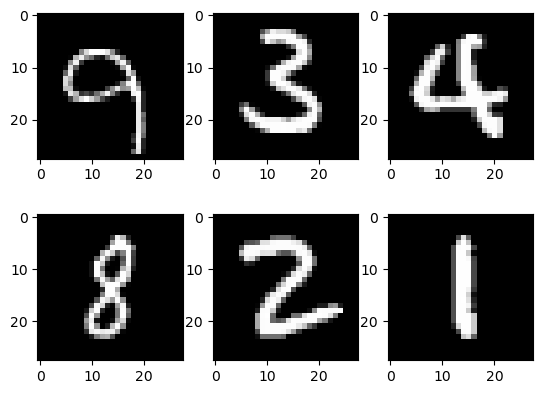

In [7]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(features[i][0], cmap='grey')

In [6]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork,self).__init__()
        self.input_size = input_size
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, num_classes)
        

    def forward(self, x):
        out = self.layer1(x)
        out = self.relu(out)
        out = self.layer2(out)
        return out

model = NeuralNetwork(input_size, hidden_size, num_classes).to(device)

In [7]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [10]:
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/10], Step [100/600], Loss: 0.3223
Epoch [1/10], Step [200/600], Loss: 0.3108
Epoch [1/10], Step [300/600], Loss: 0.2327
Epoch [1/10], Step [400/600], Loss: 0.1831
Epoch [1/10], Step [500/600], Loss: 0.2943
Epoch [1/10], Step [600/600], Loss: 0.1834
Epoch [2/10], Step [100/600], Loss: 0.1505
Epoch [2/10], Step [200/600], Loss: 0.1213
Epoch [2/10], Step [300/600], Loss: 0.1830
Epoch [2/10], Step [400/600], Loss: 0.2666
Epoch [2/10], Step [500/600], Loss: 0.0454
Epoch [2/10], Step [600/600], Loss: 0.0577
Epoch [3/10], Step [100/600], Loss: 0.0863
Epoch [3/10], Step [200/600], Loss: 0.0506
Epoch [3/10], Step [300/600], Loss: 0.0808
Epoch [3/10], Step [400/600], Loss: 0.0172
Epoch [3/10], Step [500/600], Loss: 0.1221
Epoch [3/10], Step [600/600], Loss: 0.0343
Epoch [4/10], Step [100/600], Loss: 0.0441
Epoch [4/10], Step [200/600], Loss: 0.0577
Epoch [4/10], Step [300/600], Loss: 0.1810
Epoch [4/10], Step [400/600], Loss: 0.0302
Epoch [4/10], Step [500/600], Loss: 0.0475
Epoch [4/10

In [13]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0

    for images, lables in test_loader:
        images = images.reshape(-1,28*28).to(device)
        labels = lables.to(device)

        outputs = model(images)
        _, prediction = torch.max(outputs,1)
        n_samples += labels.shape[0]
        n_correct += (prediction == labels).sum().item()

    acc = 100.0 * (n_correct/n_samples)
    print(f"Accuracy: {acc}%")
        

Accuracy: 98.09%
